# 1. label_encoder
- 문자로 된 데이터를 숫자로 변환하여 카테고리컬한 데이터로 변환

In [6]:
import pandas as pd

df = pd.DataFrame({
    'A': ['a', 'b', 'c', 'a', 'b'],
    'B': [1, 2, 3, 1, 0]
})

df

,A,B
0,a,1
1,b,2
2,c,3
3,a,1
4,b,0


### 먼저 le.fit 

In [3]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df['A'])
le.classes_

array(['a', 'b', 'c'], dtype=object)

### 그리고나서 le.transform

In [4]:
df['le_A'] = le.transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


### fit과 transform을 동시에 하려면 le.fit_transform

In [7]:
df['le_A'] = le.fit_transform(df['A'])
df

,A,B,le_A
0,a,1,0
1,b,2,1
2,c,3,2
3,a,1,0
4,b,0,1


### 숫자카테고리를 문자로 역변환 하고 싶다면

In [8]:
le.inverse_transform([1,2,2,0])

array(['b', 'c', 'c', 'a'], dtype=object)

---

# 2. min_max

![nn](img/min_max.png)

In [13]:
df = pd.DataFrame({
    'A': [10, 20, -10, 0, 25],
    'B': [1, 2, 3, 1, 0]
})
df

,A,B
0,10,1
1,20,2
2,-10,3
3,0,1
4,25,0


### fit 시키면

In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(df)

MinMaxScaler()

In [16]:
mms.data_max_ # 컬럼 별 max 값 반환

array([25.,  3.])

In [18]:
mms.data_min_ # 컬럼 별 min 값 반환

array([-10.,   0.])

### transform 시키면

In [19]:
df_mms = mms.transform(df)
df_mms

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

### 역변환 시키면

In [20]:
mms.inverse_transform(df_mms)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

### fit과 transform 동시에 하려면

In [21]:
mms.fit_transform(df)

array([[0.57142857, 0.33333333],
       [0.85714286, 0.66666667],
       [0.        , 1.        ],
       [0.28571429, 0.33333333],
       [1.        , 0.        ]])

---

# 3. standard scaler 정규분포

![nn](img/standard_scaler.png)

### fit

In [24]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df)

StandardScaler()

In [25]:
ss.mean_

array([9. , 1.4])

In [26]:
ss.scale_

array([12.80624847,  1.0198039 ])

### transform

In [28]:
df_ss = ss.transform(df)
df_ss

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### 한번에 fit, transform하려면

In [29]:
ss.fit_transform(df)

array([[ 0.07808688, -0.39223227],
       [ 0.85895569,  0.58834841],
       [-1.48365074,  1.56892908],
       [-0.70278193, -0.39223227],
       [ 1.2493901 , -1.37281295]])

### inverse 하려면

In [30]:
ss.inverse_transform(df_ss)

array([[ 10.,   1.],
       [ 20.,   2.],
       [-10.,   3.],
       [  0.,   1.],
       [ 25.,   0.]])

---

# 4. robust scaler

![nn](img/robust_scaler.png)

In [31]:
df = pd.DataFrame({
    'A': [-0.1, 0., 0.1, 0.2, 0.3, 0.4, 1.0, 1.1, 5]
})
df

,A
0,-0.1
1,0.0
2,0.1
3,0.2
4,0.3
5,0.4
6,1.0
7,1.1
8,5.0


In [33]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

mm = MinMaxScaler()
ss = StandardScaler()
rs = RobustScaler()

df_scaler = df.copy()
df_scaler['MinMax'] = mm.fit_transform(df)
df_scaler['StandardScaler'] = ss.fit_transform(df)
df_scaler['RobustScaler'] = rs.fit_transform(df)

df_scaler

,A,MinMax,StandardScaler,RobustScaler
0,-0.1,0.000000,-0.656688,-0.444444
1,0.0,0.019608,-0.590281,-0.333333
2,0.1,0.039216,-0.523875,-0.222222
3,0.2,0.058824,-0.457468,-0.111111
4,0.3,0.078431,-0.391061,0.000000
5,0.4,0.098039,-0.324655,0.111111
6,1.0,0.215686,0.073785,0.777778
7,1.1,0.235294,0.140192,0.888889
8,5.0,1.000000,2.730051,5.222222


### 이를 boxplot으로 그리면

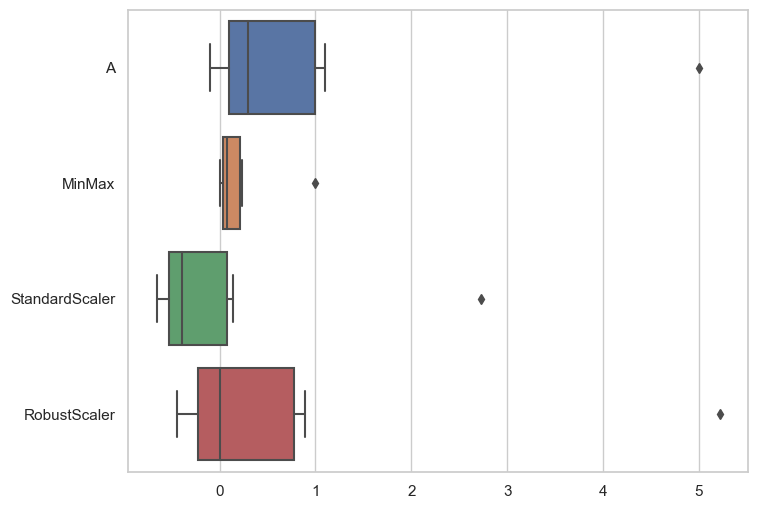

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')
plt.figure(figsize=(8,6))
sns.boxplot(data=df_scaler, orient='h');

### 아웃라이더가 존재함. 노이즈 처럼 튀는 값
- min-max는 이를 영향을 받아서 이상하게 스케일링 될 수 있다
- standard는 평균과 표준편차를 이용하는데 여기서도 아웃라이어가 관여함.
- (중요) robust는 median을 이용하기 때문에 아웃라이어의 영향이 적다